In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Display plots in Jupyter notebook
%matplotlib inline

# Load the dataset
file_path = 'ecommerce_sales_analysis.csv'  # Update with your file path
sales_data = pd.read_csv(file_path)

# Inspect data structure
print("Data Summary:")
print(sales_data.info())
print("\nSample Rows:")
print(sales_data.head())


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000

In [3]:
# 1. Data Cleaning (optional, depending on dataset)
# Check for missing values
print("\nMissing Values Per Column:")
print(sales_data.isnull().sum())

# Drop rows or handle missing values as needed
# sales_data = sales_data.dropna()  # Example: Drop rows with missing values
# Alternatively, you could fill missing values, e.g., sales_data.fillna(0, inplace=True)

# Preview columns for monthly sales
print("\nColumn Names:", sales_data.columns)



Missing Values Per Column:
product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

Column Names: Index(['product_id', 'product_name', 'category', 'price', 'review_score',
       'review_count', 'sales_month_1', 'sales_month_2', 'sales_month_3',
       'sales_month_4', 'sales_month_5', 'sales_month_6', 'sales_month_7',
       'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11',
       'sales_month_12'],
      dtype='object')


In [5]:
# 2. Calculate Total Sales for each product
# Sum across all monthly sales columns to get total sales for each product
sales_data['total_sales'] = sales_data.loc[:, 'sales_month_1':'sales_month_12'].sum(axis=1)

# Display the updated data with 'total_sales' column
print("\nData with Total Sales Calculated:")
print(sales_data[['product_id', 'product_name', 'category', 'total_sales']].head())



Data with Total Sales Calculated:
   product_id product_name        category  total_sales
0           1    Product_1        Clothing         6421
1           2    Product_2  Home & Kitchen         6027
2           3    Product_3            Toys         5580
3           4    Product_4            Toys         5022
4           5    Product_5           Books         6094



Top 5 Best-Selling Products:
     product_id product_name     category  total_sales
223         224  Product_224  Electronics         9151
285         286  Product_286     Clothing         8921
733         734  Product_734       Health         8914
904         905  Product_905       Sports         8783
179         180  Product_180       Sports         8775


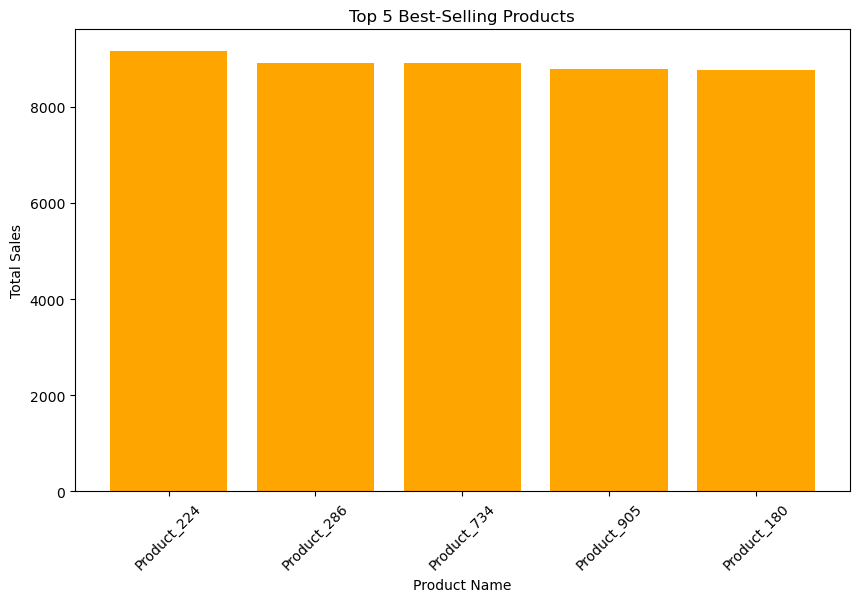

In [7]:
# 3. Best-Selling Products
# Sort products by total sales in descending order
best_selling_products = sales_data[['product_id', 'product_name', 'category', 'total_sales']].sort_values(by='total_sales', ascending=False)

# Display the top 5 best-selling products
print("\nTop 5 Best-Selling Products:")
print(best_selling_products.head())

# Plot the top 5 best-selling products
plt.figure(figsize=(10, 6))
top_5 = best_selling_products.head()
plt.bar(top_5['product_name'], top_5['total_sales'], color='orange')
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


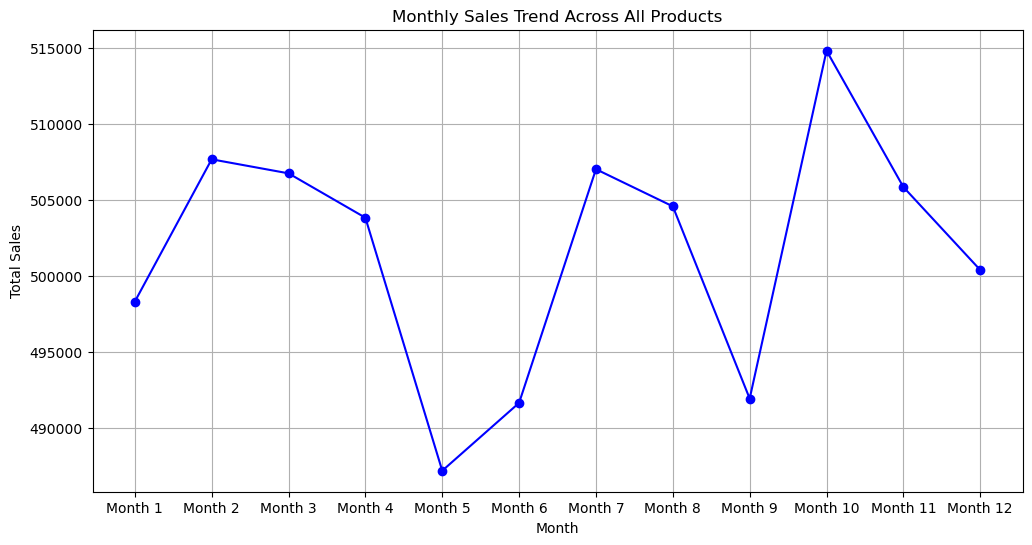

In [9]:
# 4. Monthly Sales Trend Analysis
# Calculate total sales for each month across all products
monthly_sales = sales_data.loc[:, 'sales_month_1':'sales_month_12'].sum()

# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend Across All Products')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(12), labels=[f'Month {i+1}' for i in range(12)])
plt.grid(True)
plt.show()



Category-Wise Total Sales:
category
Books             938229
Toys              917101
Sports            916371
Electronics       845120
Health            834414
Clothing          826536
Home & Kitchen    742141
Name: total_sales, dtype: int64


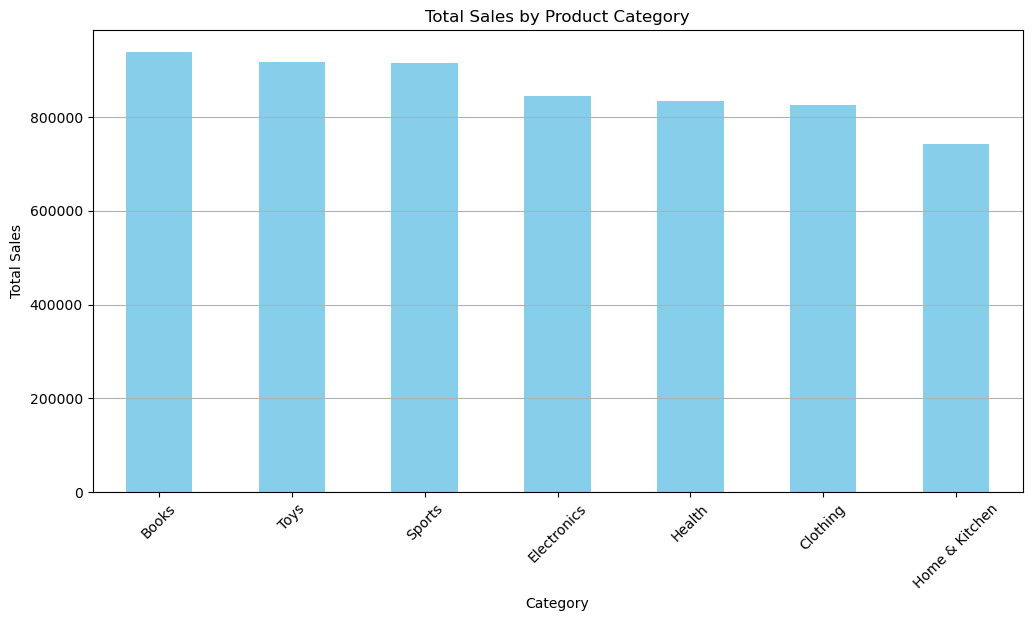

In [11]:
# 5. Category-Wise Sales Analysis
# Calculate total sales by category
category_sales = sales_data.groupby('category')['total_sales'].sum().sort_values(ascending=False)

# Display category sales for reference
print("\nCategory-Wise Total Sales:")
print(category_sales)

# Plot total sales by category
plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


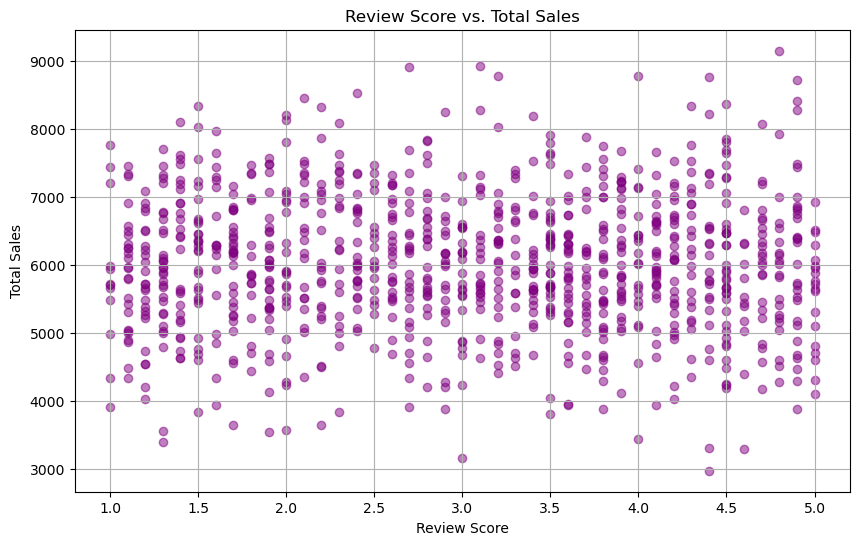


Correlation between review score and total sales: -0.01818621758928652


In [13]:
# 6. Customer Review and Sales Correlation Analysis
# Scatter plot to check if review score is correlated with total sales
plt.figure(figsize=(10, 6))
plt.scatter(sales_data['review_score'], sales_data['total_sales'], alpha=0.5, color='purple')
plt.title('Review Score vs. Total Sales')
plt.xlabel('Review Score')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Calculate correlation between review score and total sales
correlation = sales_data['review_score'].corr(sales_data['total_sales'])
print("\nCorrelation between review score and total sales:", correlation)
